### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [63]:
df = pd.read_csv('data/coupons.csv')

In [64]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

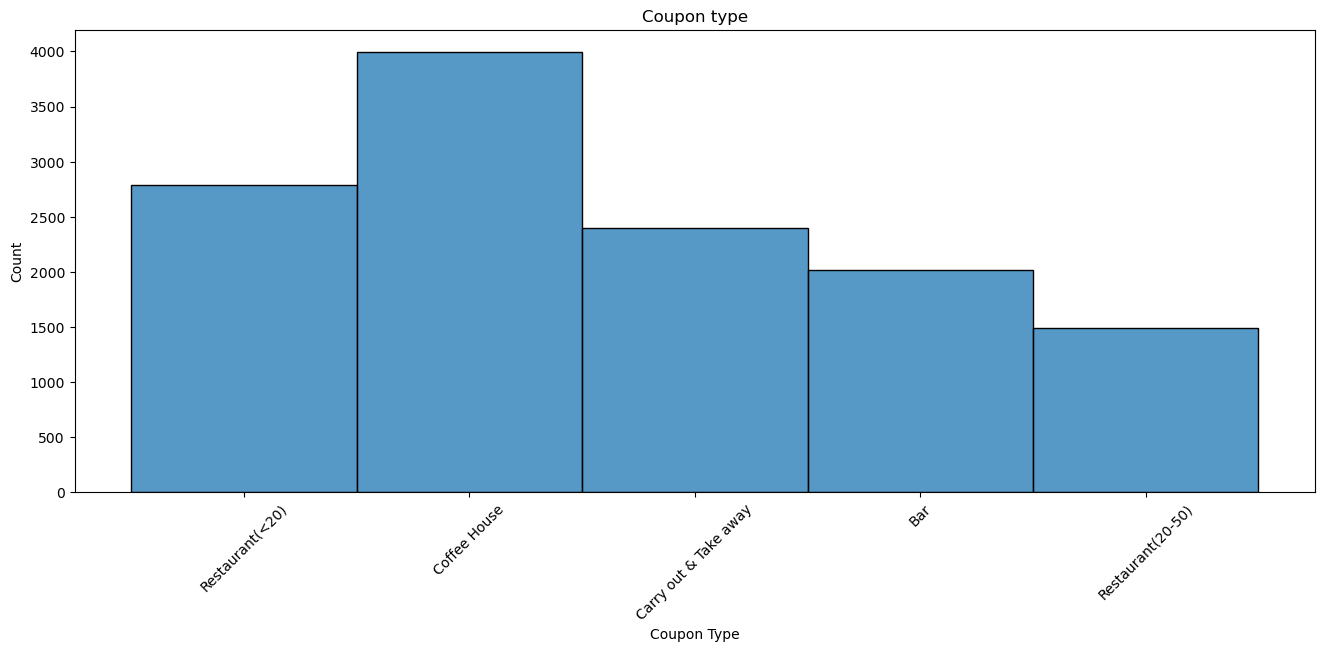

In [65]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x="coupon")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Coupon type")
plt.xticks(rotation=45)

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

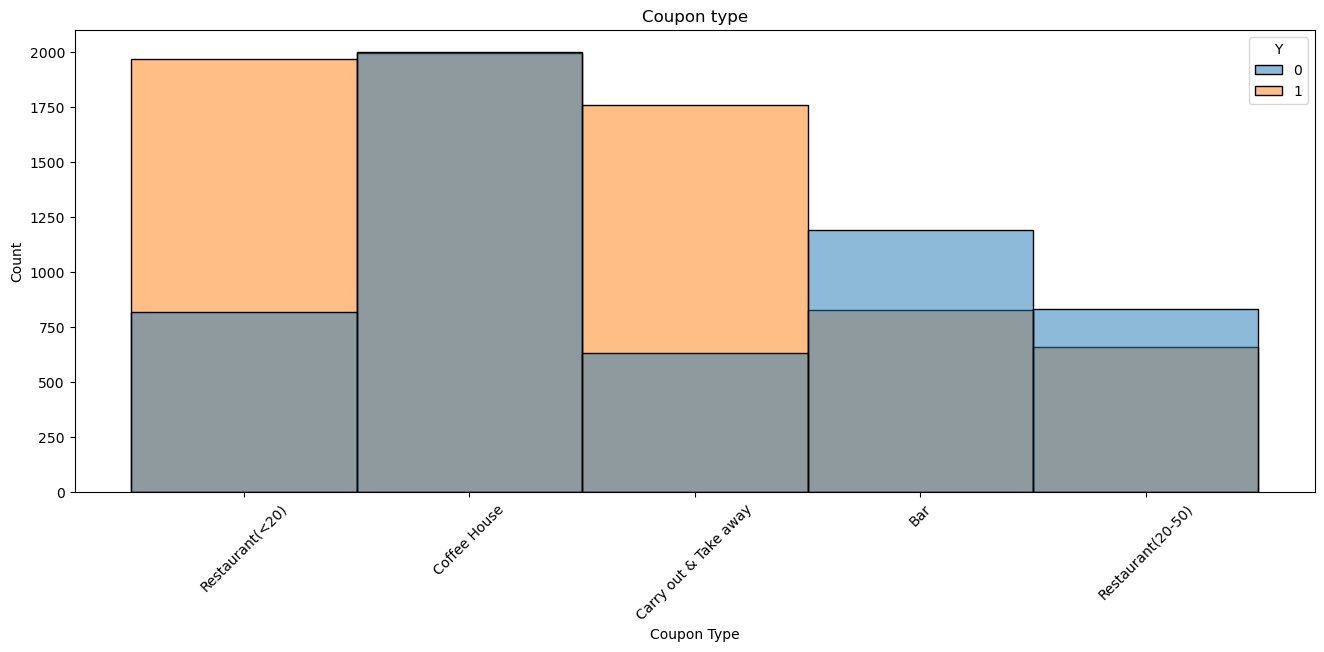

In [66]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x="coupon", hue="Y")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Coupon type")
plt.xticks(rotation=45)

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

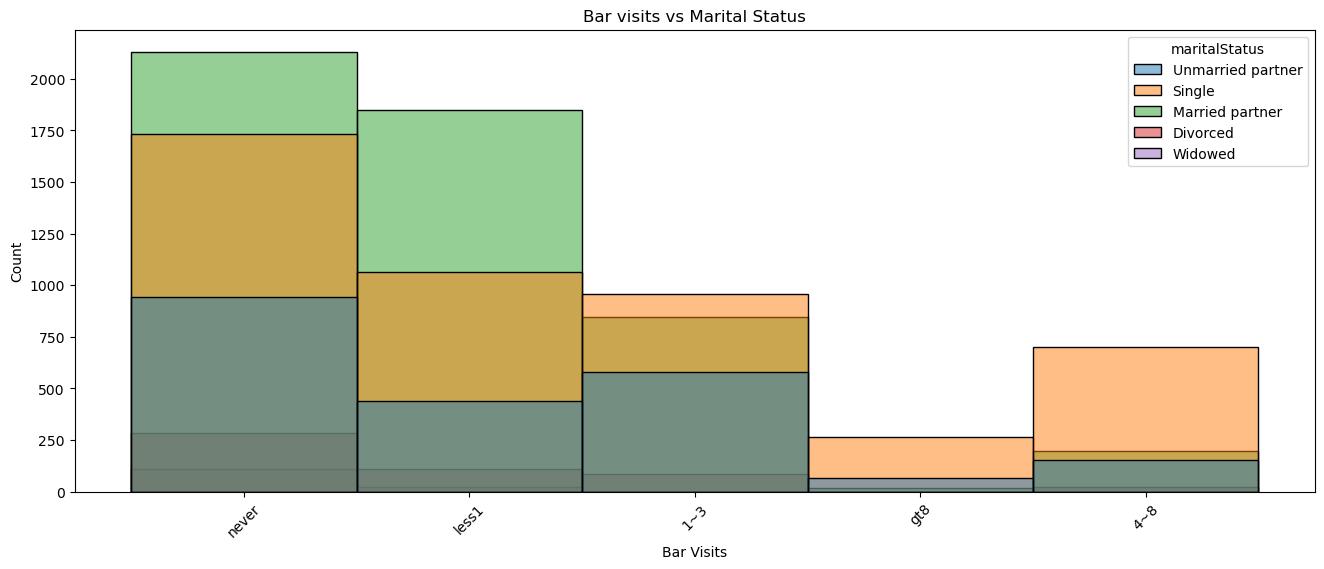

In [67]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x="Bar", hue='maritalStatus')
plt.xlabel("Bar Visits")
plt.ylabel("Count")
plt.title("Bar visits vs Marital Status")
plt.xticks(rotation=45)


C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

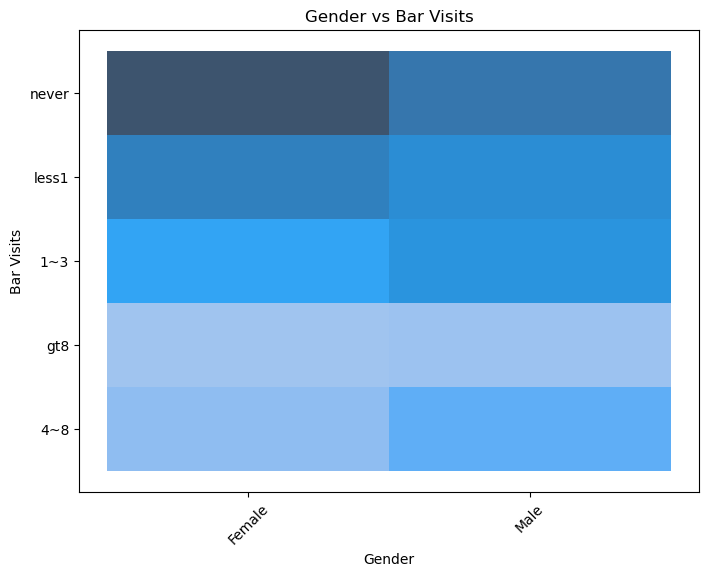

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="gender", y="Bar")
plt.xlabel("Gender")
plt.ylabel("Bar Visits")
plt.title("Gender vs Bar Visits")
plt.xticks(rotation=45)

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

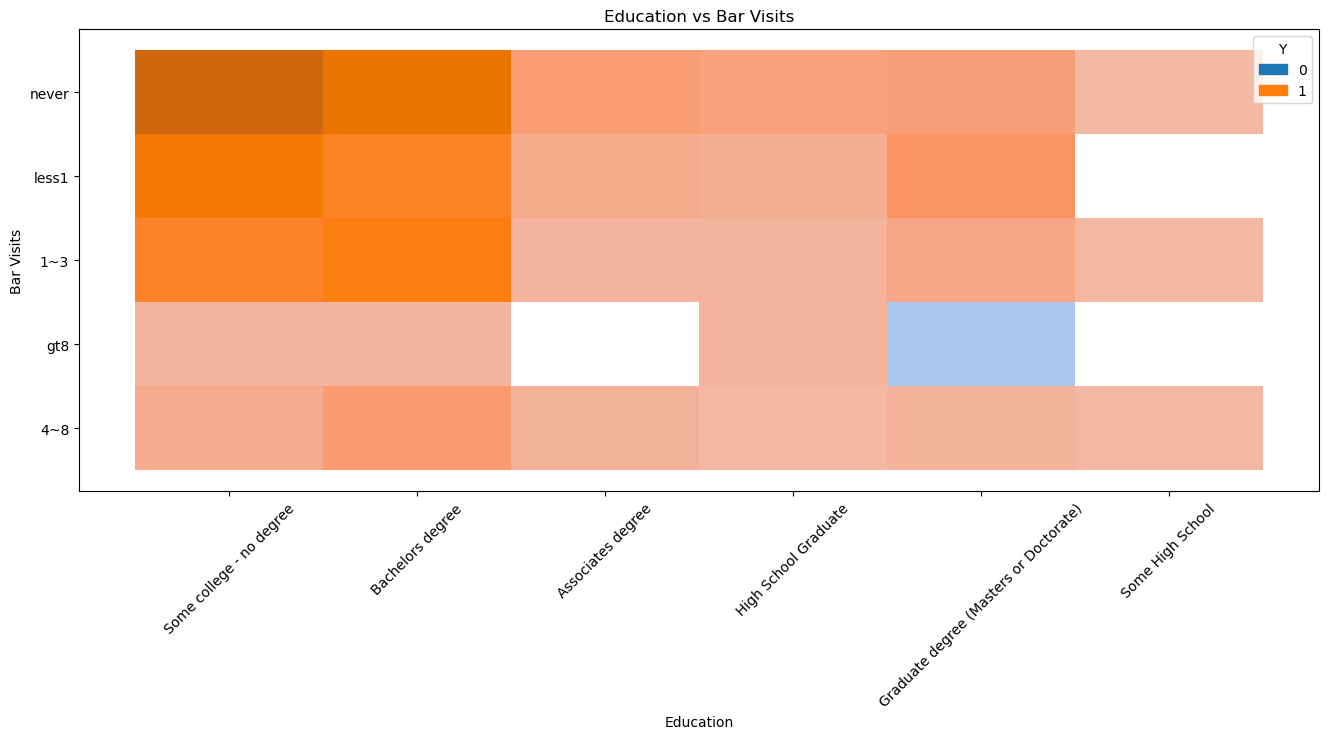

In [69]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x="education", y="Bar", hue='Y')
plt.xlabel("Education")
plt.ylabel("Bar Visits")
plt.title("Education vs Bar Visits")
plt.xticks(rotation=45)

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

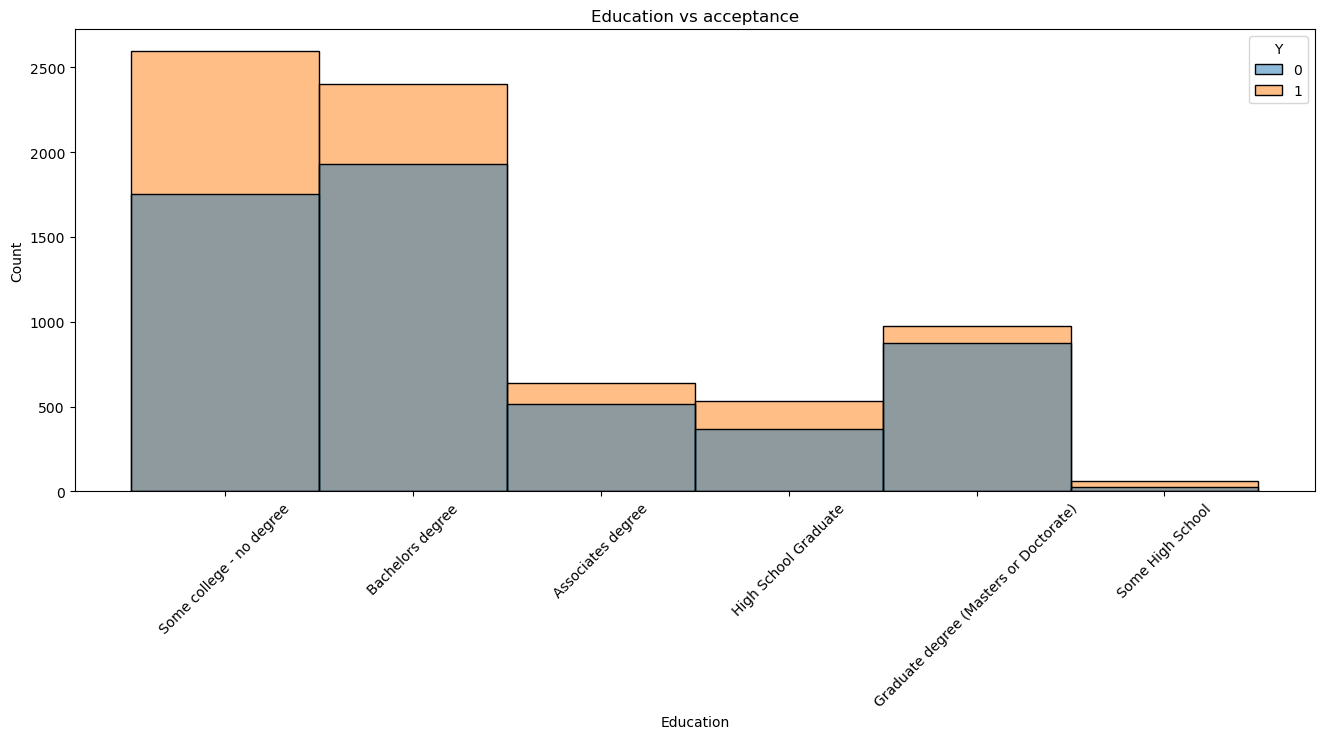

In [70]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x="education", hue="Y")
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education vs acceptance")
plt.xticks(rotation=45)

### 2. Investigate the dataset for missing or problematic data.

In [71]:
#Test to see if any null values exist
df.isnull().values.any()

True

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [73]:
#Display counts of null data in columns
df.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

### 3. Decide what to do about your missing data -- drop, replace, other...

In [74]:
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [75]:
#replace and convert to numbers
#df["age"]=df["age"].str.replace("50plus", "50")
#df["age"]=df["age"].str.replace("below21", "20")
#df["age"]=pd.to_numeric(df['age'])

In [76]:
df['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [77]:
#Fill in the missing values with never

df["Bar"]=df["Bar"].fillna("no_data")

#df['Bar']=pd.to_numeric(df['Bar'])


In [78]:
df['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [79]:
#Fill in the missing values with 0
df['RestaurantLessThan20']= df ['RestaurantLessThan20'].fillna(0)

In [80]:
df['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [81]:
#Fill in the missing values with 0
df['CarryAway']= df ['CarryAway'].fillna(0)

In [82]:
df['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [83]:
#Fill in the missing values with 0
df['Restaurant20To50']= df ['Restaurant20To50'].fillna(0)

In [84]:
df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [85]:
#Fill in the missing values with 0
df['CoffeeHouse']= df ['CoffeeHouse'].fillna(0)

#### Drop the column 'car', the data is poor

In [86]:
## Note: this data is missing >90% of values, drop this columm
df=df.drop(['car'], axis=1)

### 4. What proportion of the total observations chose to accept the coupon? 



In [87]:
percent_chose_to_accept= df['Y'].value_counts(1)
ans4=percent_chose_to_accept[1]*100
display("Percentage of obsearvations that accepted the coupon "), ans4
## 57% of observations chose to accept the coupon

'Percentage of obsearvations that accepted the coupon '

(None, 56.84326710816777)

### 5. Use a bar plot to visualize the `coupon` column.

In [88]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Text(0.5, 1.0, 'Coupon Type By Gender')

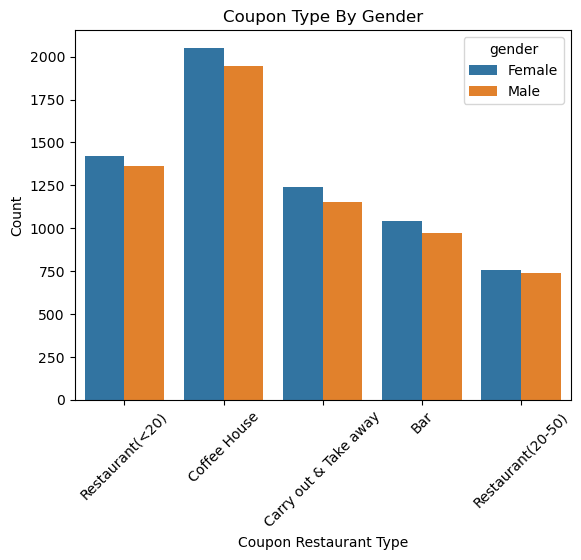

In [89]:
fig=sns.countplot(df, x="coupon", hue="gender")
plt.xticks(rotation=45)
plt.xlabel("Coupon Restaurant Type")
plt.ylabel("Count")
plt.title("Coupon Type By Gender")

### 6. Use a histogram to visualize the temperature column.

In [90]:
df['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperature Histogram')

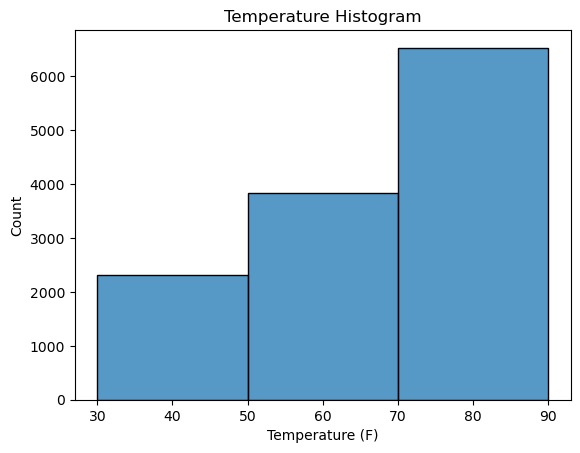

In [91]:
sns.histplot(data=df, x="temperature", binwidth=20)
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.title("Temperature Histogram")

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [92]:
df_bar=df[['Bar']]

2. What proportion of bar coupons were accepted?


In [93]:
df_bar.value_counts()

Bar    
never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
no_data     107
Name: count, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


    Y  gender      Bar     count
0   0  Female    never  0.112977
1   0  Female    less1  0.070877
2   0  Female      1~3  0.031693
3   0  Female      4~8  0.008830
4   0  Female      gt8  0.005834
5   0  Female  no_data  0.002208
6   0    Male    never  0.078603
7   0    Male    less1  0.048880
8   0    Male      1~3  0.042021
9   0    Male      4~8  0.021917
10  0    Male      gt8  0.005834
11  0    Male  no_data  0.001892
12  1  Female    never  0.126616
13  1  Female    less1  0.078997
14  1  Female      1~3  0.050378
15  1  Female      4~8  0.017108
16  1  Female      gt8  0.006149
17  1  Female  no_data  0.001656
18  1    Male    never  0.091533
19  1    Male    less1  0.075765
20  1    Male      1~3  0.070877
21  1    Male      4~8  0.036976
22  1    Male      gt8  0.009697
23  1    Male  no_data  0.002681


AttributeError: 'numpy.int64' object has no attribute 'startswith'

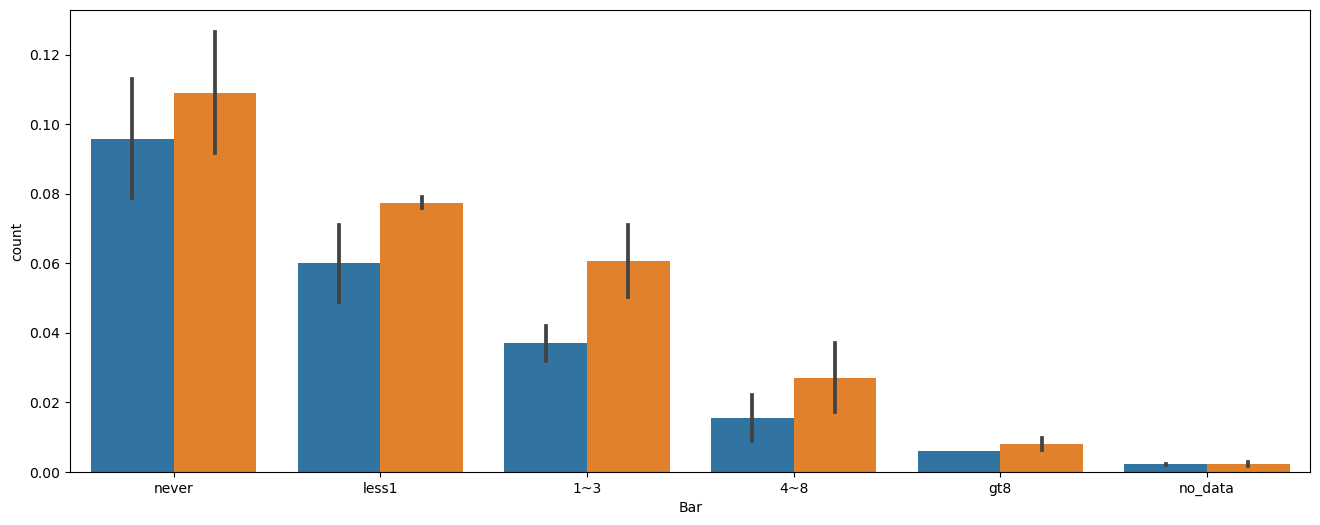

In [94]:
bar_sum = df['Bar'].value_counts().sum()

df_bar_percent = (df.groupby(['Y', 'gender'])[['Bar']].value_counts())/bar_sum
df_bar_percent= df_bar_percent.reset_index()

print(df_bar_percent)

plt.figure(figsize=(16, 6))
sns.barplot(df_bar_percent, x="Bar", y="count", hue="Y")
plt.xlabel("Bar Visits per Month")
plt.ylabel("Count")
plt.title("Bar Visit Percentage vs Gender")
plt.xticks(rotation=45)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
#Go to the bar more than once a month and > 25 years old, acceptance rate

#define a list for filtering data by criteria
filter_list_group=['1~3', '4~8', 'gt8']
filter_list_age= ['26','31','50plus','36', '41', '46']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("age== @filter_list_age & Bar == @filter_list_group & Y== @filter_list_yes")

#filtered group who didn't accept the coupon
filtered_df_no=df.query("age== @filter_list_age & Bar == @filter_list_group & Y== @filter_list_no")

#sum of value counts for filtered group
sum_no=filtered_df_no['Bar'].value_counts().sum()
sum_yes=filtered_df_yes['Bar'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Y'].value_counts().sum()/total_count), "percentage that accepted age>25 and more than one bar visit per month")
print((filtered_df_no['Y'].value_counts().sum()/total_count), "percentage that did not accept age>25 and more than one bar visit per month")

#total number of accepted coupons
entire_group_total_yes=df.query('Y == 1')
print(entire_group_total_yes['Bar'].value_counts().sum(), "Total group that said yes")

#total number of coupons
entire_group_total_no=df.query('Y == 0')
print(entire_group_total_no['Bar'].value_counts().sum(), "Total group that said no")

#total coupons
total_no= entire_group_total_no['Y'].value_counts().sum()
total_yes= entire_group_total_yes['Y'].value_counts().sum()
total_number_of_data_points=total_no +total_yes
print(total_number_of_data_points, "Total group size")

#percentage who accepted across the whole data set
print(total_yes/total_number_of_data_points,  "percentage from large group that accepted")

#percentage who didnt accept across the whole data set
print(total_no/total_number_of_data_points,  "percentage from large group that didn't accept")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [ ]:
#Data is dirty, cleaned up the parenthesis
df['passanger'] = df['passanger'].str.replace("(", "")
df['passanger'] = df['passanger'].str.replace(")", "")
print(df['passanger'].value_counts())

In [ ]:
df['occupation'].value_counts()

In [159]:
#Go to the bar more than once a month and passengers not a kid, occupations other than farming, fishing, or forestry

#define a list for filtering data by criteria
filter_list_passengers=['Friends','Partner']
filter_list_not_occupation= ['Farming Fishing & Forestry']
filter_list_group=['1~3', '4~8', 'gt8']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("passanger== @filter_list_passengers & occupation != @filter_list_not_occupation & Y== @filter_list_yes &Bar == @filter_list_group" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("passanger== @filter_list_passengers & occupation != @filter_list_not_occupation & Y== @filter_list_no &Bar == @filter_list_group" )

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")


0.6448598130841121 percentage that accepted with this filter criteria
0.35514018691588783 percentage that did not accept with this filter criteria


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [ ]:
df[['maritalStatus']].value_counts()

In [ ]:
#Go to bar more than once a month, had passengers that weren't a kid, were not widowed

#define a list for filtering data by criteria
filter_list_passengers=['Friends','Partner']
filter_list_maritalStatus=['Widowed']
filter_list_group=['1~3', '4~8', 'gt8'] #more than once a month
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("passanger== @filter_list_passengers & maritalStatus != @filter_list_maritalStatus & Y== @filter_list_yes &Bar == @filter_list_group" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("passanger== @filter_list_passengers & maritalStatus != @filter_list_maritalStatus & Y== @filter_list_no &Bar == @filter_list_group" )

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")


In [ ]:
#go to bars more than once a month and are under the age of 30
#df.info()
#print(df[['age']].value_counts())

#define a list for filtering data by criteria
filter_list_age=['21','26','below21']
filter_list_maritalStatus=['Widowed']
filter_list_group=['1~3', '4~8', 'gt8'] #more than once a month
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("age== @filter_list_age & Y== @filter_list_yes &Bar == @filter_list_group" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("age== @filter_list_age & Y== @filter_list_no &Bar == @filter_list_group" )

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")



In [ ]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.

#df.info()
#print(df[['income']].value_counts())

#define a list for filtering data by criteria
filter_list_RestaurantLessThan20=['4~8','gt8']
filter_list_income=['$25000 - $37499','$12500 - $24999', '$37500 - $49999', 'Less than $12500']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("income== @filter_list_income & Y== @filter_list_yes &RestaurantLessThan20 == @filter_list_RestaurantLessThan20" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("income== @filter_list_income & Y== @filter_list_no &RestaurantLessThan20 == @filter_list_RestaurantLessThan20" )

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Summary: Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

### Those under 25 accepted the coupon 62% of the time, while the entire acceptance group was 57%. Younger people who go to the bar once a month accept the coupon slightly more than the larger group.

### Go to the bar more than once a month and passengers not a kid, occupations other than farming, fishing, or forestry. This group had a 69% acceptance rate.

### Go to bars more than once a month, had passengers that were not a kid, and were not widowed. This group had a 69% acceptance rate.
### Go to bars more than once a month and are under the age of 30, 63% acceptance.

### Go to o cheap restaurants more than 4 times a month and income is less than 50K60% acceptance.




### Poeple who werent widowed and had passengers in the car were a little more likely to accept the coupon. People with lower incomes and who ate at cheap restaurants often, accepted the coupon less than the overall group. People who have less money have less discretionary income, so this makes sense.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Lets looker deeper into how bar and restaurant visits correlate with income and accepting the coupon.

##### Look at people who make more than 50k, who go to the bar more than once a month

In [150]:
#define a list for filtering data by criteria
filter_list_Bar=['1~3','4~8','gt8']
filter_list_income=['$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$50000 - $62499','$100000 or More']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("income== @filter_list_income & Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("income== @filter_list_income & Y== @filter_list_no &Bar == @filter_list_Bar" ) 

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

0.6040794979079498 percentage that accepted with this filter criteria
0.3959205020920502 percentage that did not accept with this filter criteria


### Summary: 60% of those who make more than 50k, and go to the bar more than 4 times per month, accepted the coupon. How about 100k?


##### 100,000k or more

In [151]:
#define a list for filtering data by criteria
filter_list_Bar=['1~3','4~8','gt8']
filter_list_income=['$100000 or More']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("income== @filter_list_income & Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("income== @filter_list_income & Y== @filter_list_no &Bar == @filter_list_Bar" ) 


#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

0.6514084507042254 percentage that accepted with this filter criteria
0.3485915492957746 percentage that did not accept with this filter criteria


### Summary: 65% accepted the coupon who visit the bar monthly and make 100k or more a year. How about low wage earners?

##### Less than 12.5k

In [152]:
#define a list for filtering data by criteria
filter_list_Bar=['1~3','4~8','gt8']
filter_list_income=['Less than $12500']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("income== @filter_list_income & Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("income== @filter_list_income & Y== @filter_list_no &Bar == @filter_list_Bar" ) 


#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

0.6780626780626781 percentage that accepted with this filter criteria
0.32193732193732194 percentage that did not accept with this filter criteria


### 68% of those who make <12.5k accepted the coupon. Next, lets's look at bar visits per month vs acceptance

####  How do bar visits per month affect acceptance?

Never visit

In [156]:
#define a list for filtering data by criteria
filter_list_Bar=['never']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("Y== @filter_list_no &Bar == @filter_list_Bar" ) 

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

0.5324225514720031 percentage that accepted with this filter criteria
0.46757744852799693 percentage that did not accept with this filter criteria


### 53% of those who never go to the bar, accepted the coupon

##### 1~3 visits

In [157]:
#define a list for filtering data by criteria
filter_list_Bar=['1~3']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("Y== @filter_list_no &Bar == @filter_list_Bar" ) 

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

0.6219167003639304 percentage that accepted with this filter criteria
0.37808329963606957 percentage that did not accept with this filter criteria


### 62% of those who go to the bar between 1 and 3 times per month accepted the coupon

##### 4~8 visits

In [158]:
#df.info() #Save this line to pull the df info easily for the filter
print(df[['Bar']].value_counts())  #save this line to view targetted data set

#define a list for filtering data by criteria
filter_list_Bar=['4~8']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("Y== @filter_list_no &Bar == @filter_list_Bar" ) 

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

Bar    
never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
no_data     107
Name: count, dtype: int64
0.637546468401487 percentage that accepted with this filter criteria
0.362453531598513 percentage that did not accept with this filter criteria


### 64% of those who go the bar between 4 and 8 times per month accepted the coupon

### Let's look at the coupon acceptance of those who visit the bar more than 8 times per month

In [147]:
#df.info() #Save this line to pull the df info easily for the filter
print(df[['Bar']].value_counts())  #save this line to view targetted data set

#define a list for filtering data by criteria
filter_list_Bar=['gt8']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("Y== @filter_list_yes &Bar == @filter_list_Bar" )

#filtered group who didn't accept the coupon
filtered_df_no=df.q
uery("Y== @filter_list_no &Bar == @filter_list_Bar" ) 

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

Bar    
never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
no_data     107
Name: count, dtype: int64
0.5759312320916905 percentage that accepted with this filter criteria
0.42406876790830944 percentage that did not accept with this filter criteria


### Summary:People who visit the bar eight times per month, accepted coupons 58% of the time. This is lower than the other groups who visit the bar less. It would be a good follow up question to determine why this group accepts coupons less (assumably they are focused more on drinking than eating, so the type of coupon would be important. Let's next look at people who visit higher end restaurants eight times per month.

In [149]:
#df.info() #Save this line to pull the df info easily for the filter
print(df[['Bar']].value_counts())  #save this line to view targetted data set

#define a list for filtering data by criteria
filter_list_Restaurant20To50=['gt8']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("Y== @filter_list_yes &Restaurant20To50 == @filter_list_Restaurant20To50" )

#filtered group who didn't accept the coupon
filtered_df_no=df.query("Y== @filter_list_no &Restaurant20To50 == @filter_list_Restaurant20To50" )

#sum of value counts for filtered group
sum_no=filtered_df_no['Y'].value_counts().sum()
sum_yes=filtered_df_yes['Y'].value_counts().sum()
total_count = sum_no + sum_yes

#acceptance rate in filtered groups
print((filtered_df_yes['Bar'].value_counts().sum()/total_count), "percentage that accepted with this filter criteria")
print((filtered_df_no['Bar'].value_counts().sum()/total_count), "percentage that did not accept with this filter criteria")

Bar    
never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
no_data     107
Name: count, dtype: int64
0.6628787878787878 percentage that accepted with this filter criteria
0.3371212121212121 percentage that did not accept with this filter criteria


### Summary: People who ate at resturants from 20-50 dollars a meal, accepted the coupon 66% percent of the time. I would assume this group has discretionary income and this is why acceptance is higher (they eat and drink out a lot more than the bar groups). Let's next look at the relationship between income and bar visits.

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$37500 - $49999'),
  Text(1, 0, '$62500 - $74999'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$75000 - $87499'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

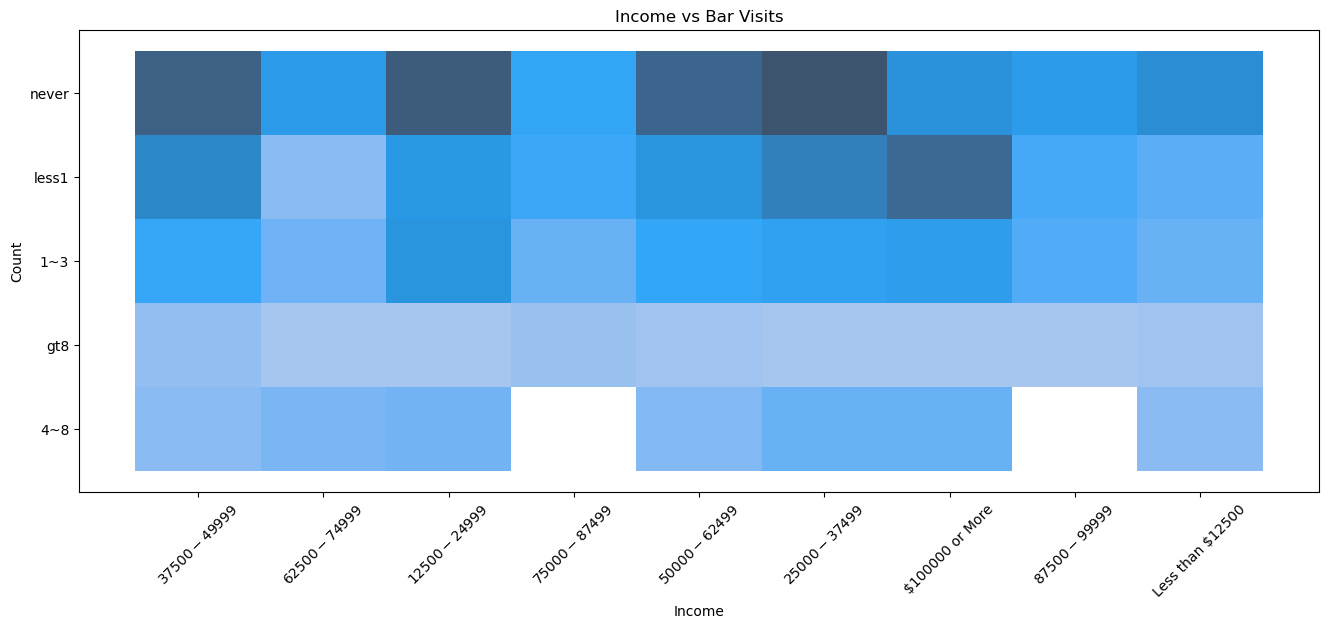

In [145]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df.query('Bar != "no_data"'), x="income", y="Bar")
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income vs Bar Visits")
plt.xticks(rotation=45)


### Summary: In general, alcoholism (visiting a bar greater than 8 times per month) is common across all income groups. Lower to middle class wage earners were more likely to never visit bars than the higher earners. This could be due to more discretionary income, which is certainly another question I'd look into, in future endeavours.

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

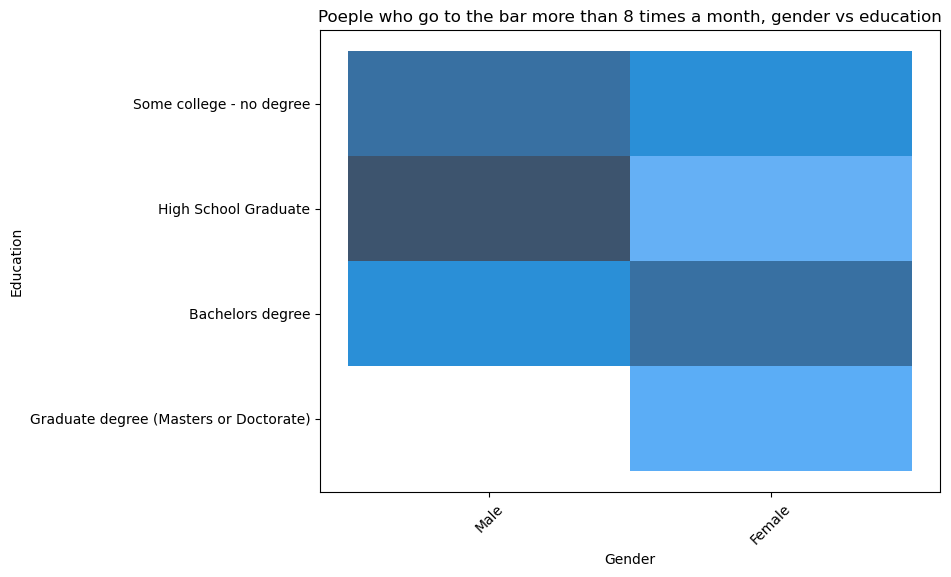

In [144]:
#Filter down bar visits to greater than 8 vs education
filter_list_Bar=['gt8']
df_filter=df.query("Bar=='gt8'")


plt.figure(figsize=(8, 6))
sns.histplot(data=df_filter, x="gender",y='education')

plt.xlabel("Gender")
plt.ylabel("Education")
plt.title("Poeple who go to the bar more than 8 times a month, gender vs education")
plt.xticks(rotation=45)

 

### This visualization shows that the women in this group are more likely to go the bar eight times a month, the more educated they are. For men, those who didn't go to college or are in college without a degree were more likely to go to the bar eight times a month.

## How does income and occupation affect acceptance of coupons for each group?


#### Visualize overall acceptance by income group and coupon type

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$100000 or More'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

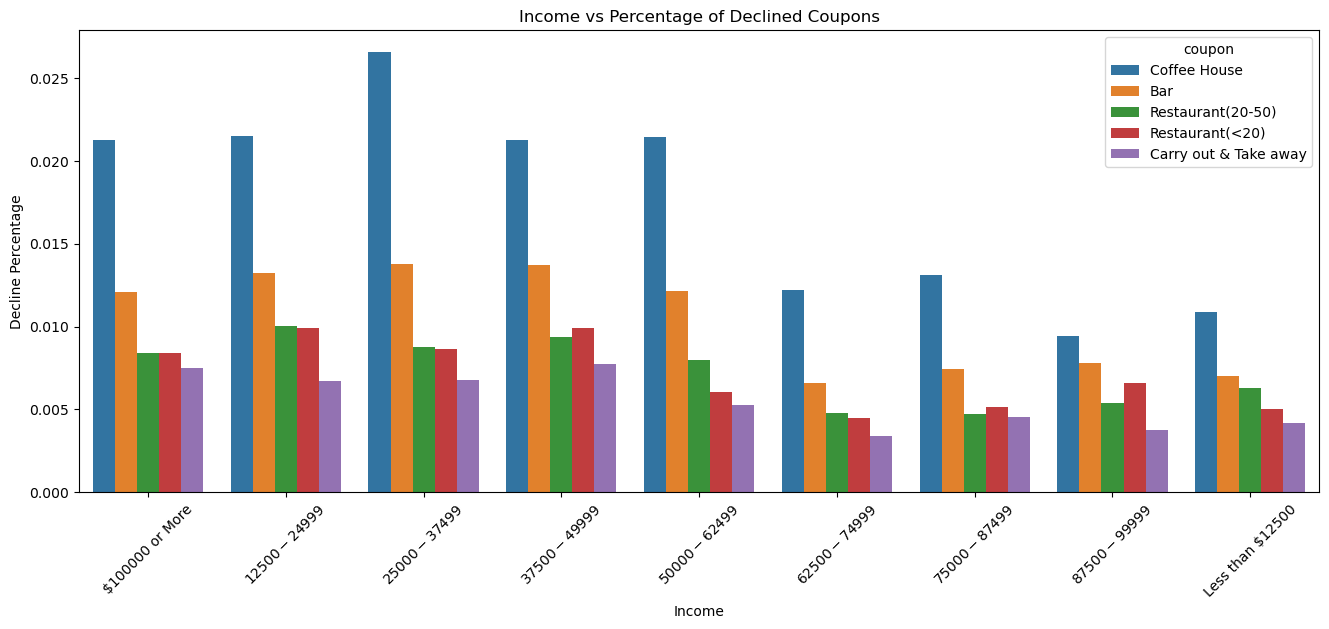

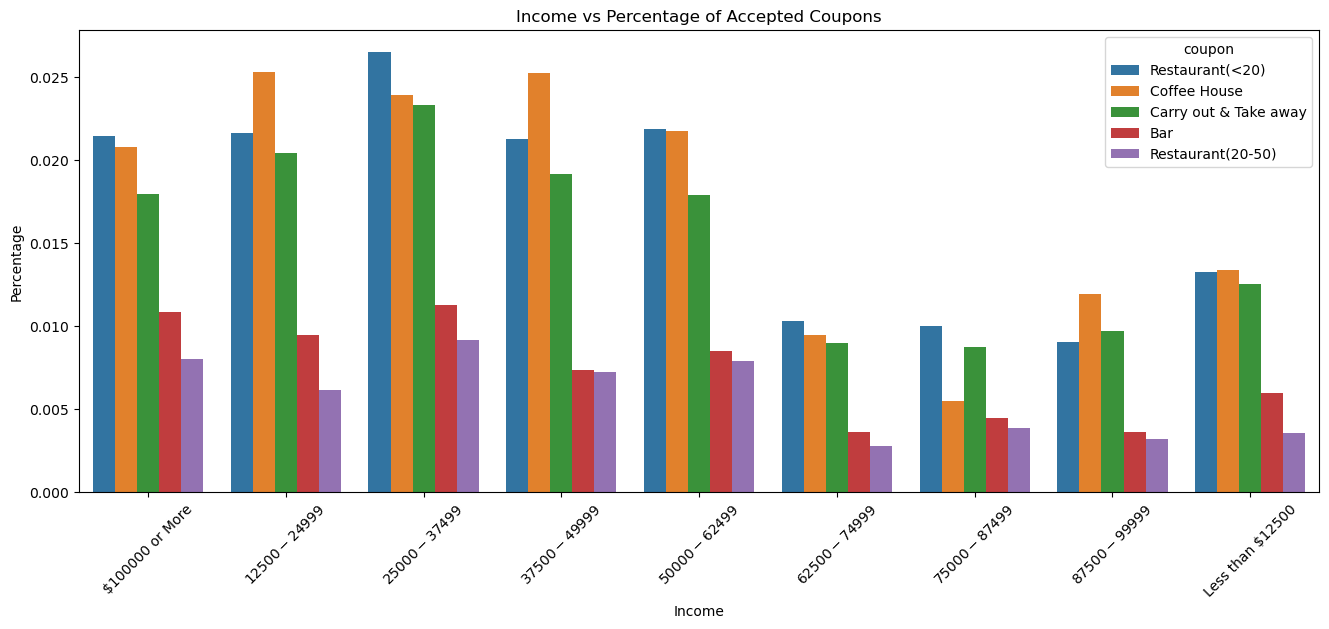

In [160]:
#define a list for filtering data by criteria
filter_list_income=['$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$50000 - $62499','$100000 or More', 'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
filter_list_coupon=['Coffee House', 'Restaurant(<20)','Carry out & Take away','Bar','Restaurant(20-50)']
filter_list_yes= [1]
filter_list_no= [0]

#filtered group who accepted the coupon
filtered_df_yes=df.query("income== @filter_list_income & coupon == @filter_list_coupon & Y== @filter_list_yes")

#filtered group who didn't accept the coupon
filtered_df_no=df.query("income== @filter_list_income & coupon == @filter_list_coupon & Y== @filter_list_no")

#Percentages who didnt accept
no_df = filtered_df_no.groupby('income')[['coupon', 'Y']].value_counts()
percentage_df_by_income= no_df/df['coupon'].value_counts().sum()
percentage_df_by_income=percentage_df_by_income.reset_index()
#print(percentage_df_by_income)

plt.figure(figsize=(16, 6))
sns.barplot(data=percentage_df_by_income, x='income', y='count', hue='coupon')
plt.xlabel("Income")
plt.ylabel("Decline Percentage")
plt.title("Income vs Percentage of Declined Coupons")
plt.xticks(rotation=45)

#Percentages who did accept
yes_df = filtered_df_yes.groupby('income')[['coupon', 'Y']].value_counts()
percentage_df_by_income= yes_df/df['coupon'].value_counts().sum()
percentage_df_by_income=percentage_df_by_income.reset_index()
#print(percentage_df_by_income)

plt.figure(figsize=(16, 6))
sns.barplot(data=percentage_df_by_income, x='income', y='count', hue='coupon')
plt.xlabel("Income")
plt.ylabel("Percentage")
plt.title("Income vs Percentage of Accepted Coupons")
plt.xticks(rotation=45)

### Summary: Largely, people who make less than $62.5k accept coupons at the higher rates than their peers in higher earning groups. Interestingly, the 100k group accepted coupons much higher than the middle income groups. It would be good to normalize this chart, to make sure we are not underestimating the strength of a smaller group. Let's look closer at the 100k group versus education and occupation.


C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'Axes' object has no attribute 'savefig'

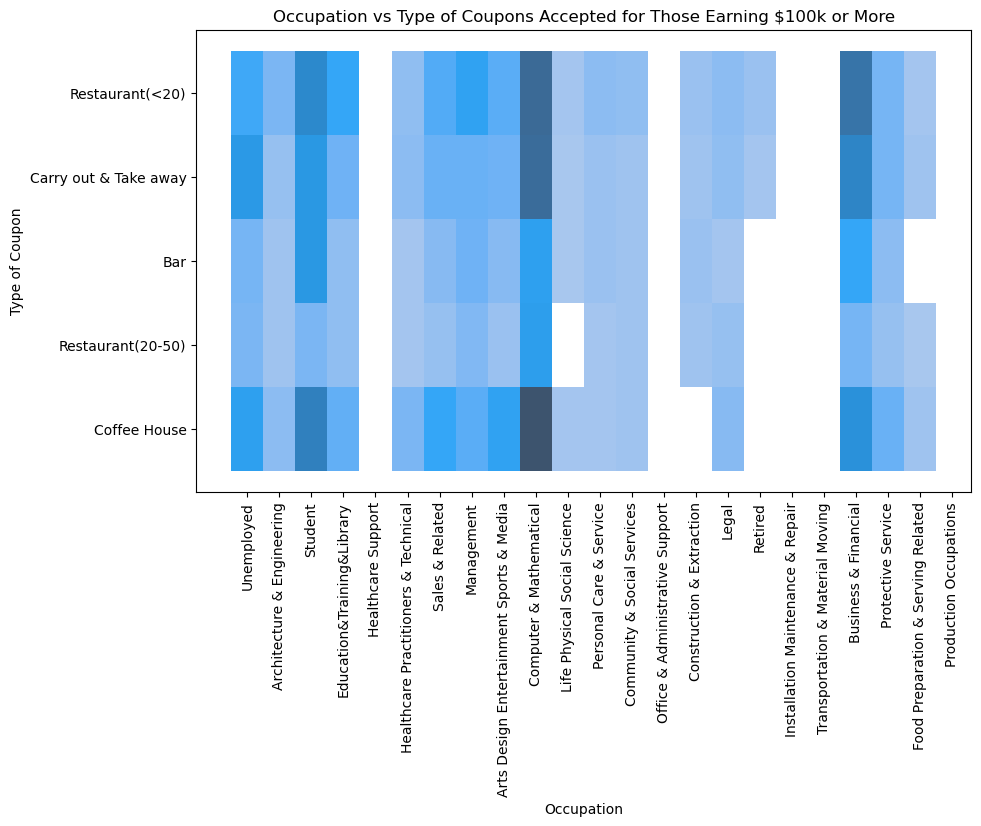

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y=df.query('income == "$100000 or More" & Y == 1')['coupon'], x='occupation')
plt.xlabel("Occupation")
plt.ylabel("Type of Coupon")
plt.title("Occupation vs Type of Coupons Accepted for Those Earning $100k or More")
plt.xticks(rotation=90)
fig.savefig("output.png")

### Summary: Of the high earners, computer and math along with business and financial roles, we're more likely to accept coupons in general. Coffee house coupons were accepted at a higher rate than all other coupon types.

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21,

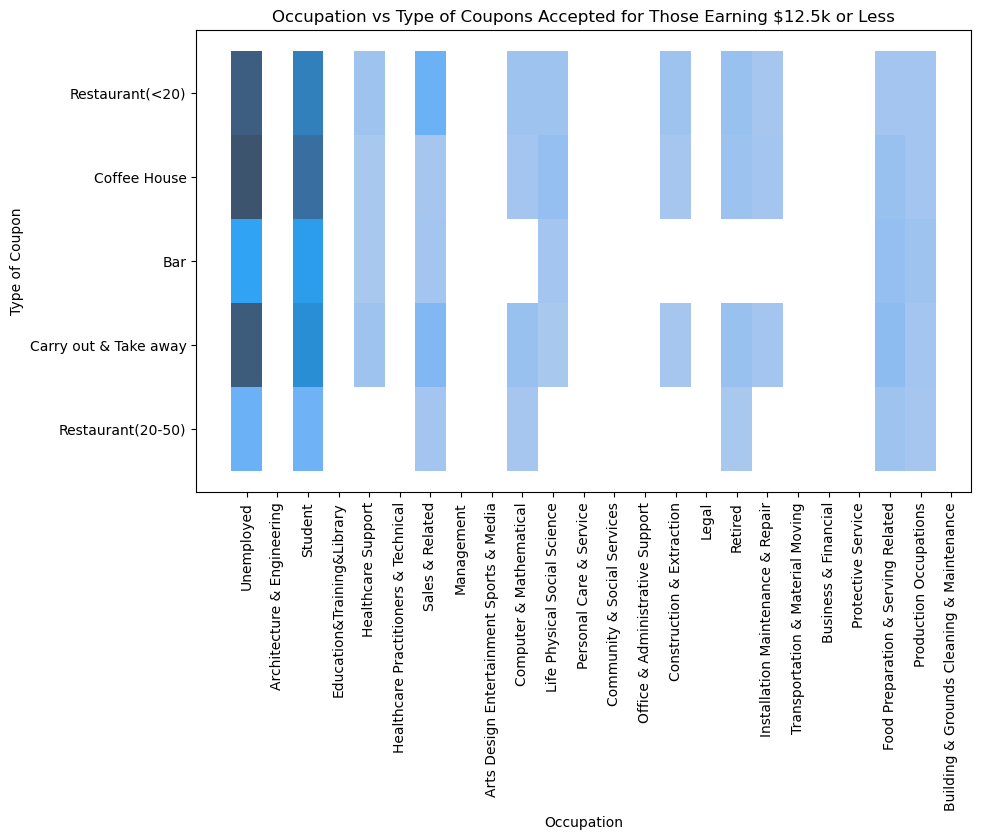

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y=df.query('income == "Less than $12500" & Y == 1')['coupon'], x='occupation')
plt.xlabel("Occupation")
plt.ylabel("Type of Coupon")
plt.title("Occupation vs Type of Coupons Accepted for Those Earning $12.5k or Less")
plt.xticks(rotation=90)


### Summary: Of those that made less than $12.5k accepted coupons, students and unemployed people accepted coupons at a much higher rate than other professions.

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21,

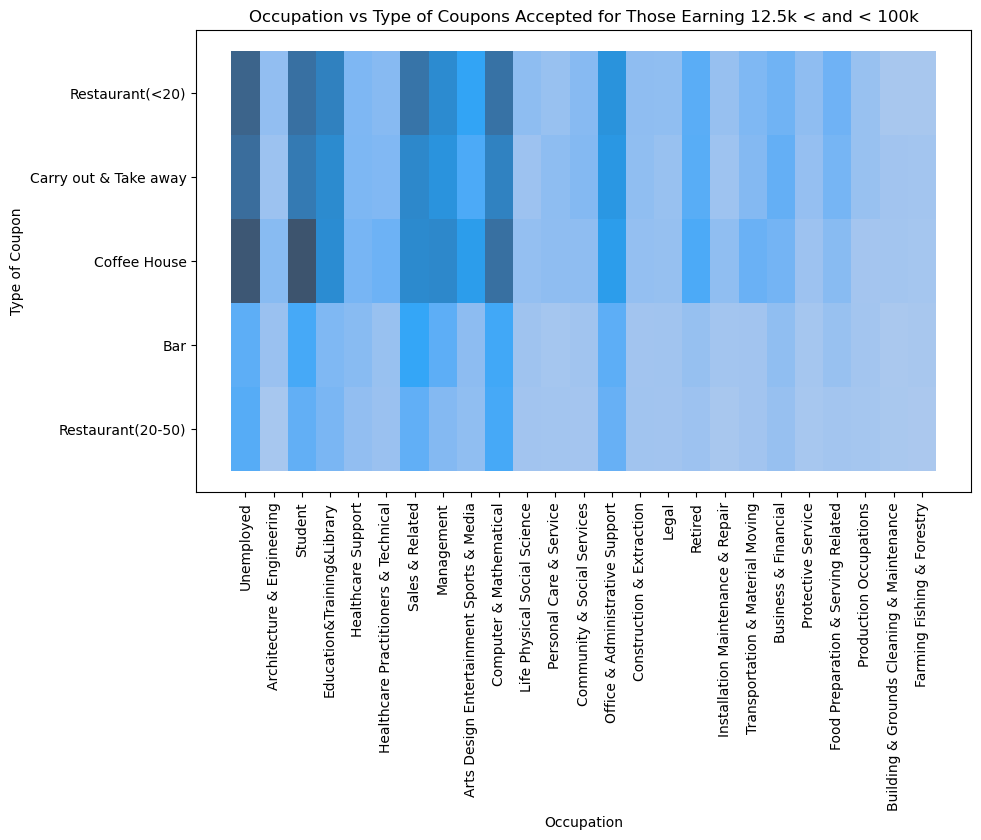

In [129]:
#Visualize the middle income groups, removing those that earn less than $12.5k and over $100k
plt.figure(figsize=(10, 6))
x_list=['$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$50000 - $62499', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
sns.histplot(data=df, y=df.query('income == @x_list & Y == 1')['coupon'], x='occupation')
plt.xlabel("Occupation")
plt.ylabel("Type of Coupon")
plt.title("Occupation vs Type of Coupons Accepted for Those Earning 12.5k < and < 100k")
plt.xticks(rotation=90)


### Summary: For the middle income group, student, unemployed and computer/math professions accepted coupons the most. It would be interesting to look deeper into why these groups are more willing to accept coupons. The most accepted coupons are for low cost restaurants and coffee shops. This would correlate well with a student lifestyle. The bar coupon group was fairly well rounded across the group at this income range, which does make sense: our culture is quite intermixed with alcohol use.